**Autoencoders**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0734 - val_loss: 0.0230
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0216 - val_loss: 0.0187
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0177 - val_loss: 0.0164
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0136 - val_loss: 0.0132
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0133 - val_loss: 0.0126
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 10/10
235/235 ━━━━━━━━━

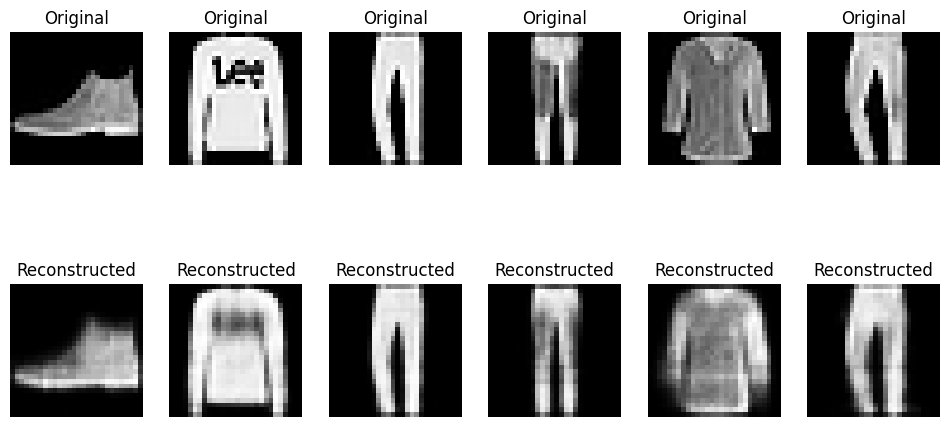

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


input_img = layers.Input(shape=(28, 28, 1))


x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)
bottleneck = layers.Dense(64, activation='relu')(x)


x = layers.Dense(128, activation='relu')(bottleneck)
x = layers.Dense(28 * 28, activation='sigmoid')(x)
decoded_img = layers.Reshape((28, 28, 1))(x)


autoencoder = models.Model(input_img, decoded_img)


autoencoder.compile(optimizer='adam', loss='mean_squared_error')


autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


reconstruction_loss = autoencoder.evaluate(x_test, x_test)
print(f'Reconstruction Loss: {reconstruction_loss}')


decoded_imgs = autoencoder.predict(x_test)


n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
